In [1]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.2 MB/s eta 0:00:00


In [55]:
# @title
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.signal import find_peaks
# import chart_studio.plotly as py
# import cufflinks as cf
%matplotlib inline

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected = True)
# cf.go_offline()
# import plotly.graph_objects as go

import plotly.express as px
pd.options.plotting.backend = "plotly"

In [3]:
AZI_FILE = pd.read_csv('/content/drive/MyDrive/Task 3/Task 3/HP_450/Canopy 2x2 SM_Proto_1_0_Elev_Cut.csv', sep= ',', header=0)

In [4]:
DF_AZI_FILE = AZI_FILE[10:]
DF_AZI_FILE.columns = AZI_FILE.iloc[9]
DF_AZI_FILE = DF_AZI_FILE.reset_index(drop=True)
DF_AZI_FILE

9    Frequency Port ID   Port Name Pol. Axis Step Axis Scan Axis  \
0          NaN       1  HORIZONTAL         0         0      -180   
1          NaN       1  HORIZONTAL         0         0  -179.750   
2          NaN       1  HORIZONTAL         0         0  -179.500   
3          NaN       1  HORIZONTAL         0         0  -179.250   
4          NaN       1  HORIZONTAL         0         0      -179   
...        ...     ...         ...       ...       ...       ...   
2875       NaN       1  HORIZONTAL        90         0   178.750   
2876       NaN       1  HORIZONTAL        90         0       179   
2877       NaN       1  HORIZONTAL        90         0   179.250   
2878       NaN       1  HORIZONTAL        90         0   179.500   
2879       NaN       1  HORIZONTAL        90         0   179.750   

9    Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz Gain in dB @ 5.150 GHz  \
0                   -16.567                -18.806                -19.687   
1                   -16.993                -19.402                -20.262   
2                   -17.559                -20.112                -21.015   
3                   -18.114                -20.981                -21.946   
4                   -18.972                -22.145                -23.207   
...                     ...                    ...                    ...   
2875                -22.716                -21.752                -23.124   
2876                -22.809                -21.830                -23.040   
2877                -22.847                -21.835                -22.965   
2878                -23.017                -21.920                -22.979   
2879                -23.270                -22.038                -23.029   

9    Gain in dB @ 5.175 GHz  ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz  \
0                   -22.116  ...                -18.589            -20.088   
1                   -22.881  ...                -19.095            -20.517   
2                   -23.939  ...                -19.704            -21.109   
3                   -25.168  ...                -20.636            -21.957   
4                   -26.860  ...                -21.807            -23.069   
...                     ...  ...                    ...                ...   
2875                -24.199  ...                -19.865            -19.541   
2876                -24.029  ...                -19.816            -19.500   
2877                -23.985  ...                -19.739            -19.471   
2878                -23.999  ...                -19.663            -19.410   
2879                -24.105  ...                -19.587            -19.387   

9    Gain in dB @ 7.025 GHz Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz  \
0                   -22.424                -25.152                -26.575   
1                   -22.635                -25.007                -26.186   
2                   -23.031                -25.181                -26.229   
3                   -23.689                -25.683                -26.677   
4                   -24.642                -26.523                -27.684   
...                     ...                    ...                    ...   
2875                -19.359                -18.442                -18.585   
2876                -19.313                -18.321                -18.476   
2877                -19.255                -18.223                -18.360   
2878                -19.215                -18.125                -18.264   
2879                -19.188                -18.051                -18.186   

9    Gain in dB @ 7.100 GHz Gain in dB @ 7.125 GHz Gain in dB @ 7.150 GHz  \
0                   -25.638                -23.897                -20.947   
1                   -25.560                -23.953                -21.011   
2                   -25.757                -24.313                -21.345   
3                   -26.337                -25.041                -21.966   
4          

In [5]:
DF_AZI_FILE = DF_AZI_FILE.drop(['Frequency','Port ID','Port Name','Step Axis'], axis = 1)

In [6]:
DF_AZI_FILE

9    Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz  \
0            0      -180                -16.567                -18.806   
1            0  -179.750                -16.993                -19.402   
2            0  -179.500                -17.559                -20.112   
3            0  -179.250                -18.114                -20.981   
4            0      -179                -18.972                -22.145   
...        ...       ...                    ...                    ...   
2875        90   178.750                -22.716                -21.752   
2876        90       179                -22.809                -21.830   
2877        90   179.250                -22.847                -21.835   
2878        90   179.500                -23.017                -21.920   
2879        90   179.750                -23.270                -22.038   

9    Gain in dB @ 5.150 GHz Gain in dB @ 5.175 GHz Gain in dB @ 5.200 GHz  \
0                   -19.687                -22.116                -24.751   
1                   -20.262                -22.881                -25.938   
2                   -21.015                -23.939                -27.464   
3                   -21.946                -25.168                -29.498   
4                   -23.207                -26.860                -32.537   
...                     ...                    ...                    ...   
2875                -23.124                -24.199                -25.435   
2876                -23.040                -24.029                -25.089   
2877                -22.965                -23.985                -24.859   
2878                -22.979                -23.999                -24.728   
2879                -23.029                -24.105                -24.649   

9    Gain in dB @ 5.225 GHz Gain in dB @ 5.250 GHz Gain in dB @ 5.275 GHz  \
0                   -24.952                -22.948                -22.425   
1                   -25.992                -23.996                -23.640   
2                   -27.411                -25.295                -25.072   
3                   -29.346                -27.045                -26.795   
4                   -32.220                -29.473                -28.955   
...                     ...                    ...                    ...   
2875                -29.481                -32.767                -32.223   
2876                -28.505                -31.857                -32.911   
2877                -27.748                -30.991                -33.384   
2878                -27.082                -30.296                -33.511   
2879                -26.597                -29.727                -33.317   

9     ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz Gain in dB @ 7.025 GHz  \
0     ...                -18.589            -20.088                -22.424   
1     ...                -19.095            -20.517                -22.635   
2     ...                -19.704            -21.109                -23.031   
3     ...                -20.636            -21.957                -23.689   
4     ...                -21.807            -23.069                -24.642   
...   ...                    ...                ...                    ...   
2875  ...                -19.865            -19.541                -19.359   
2876  ...                -19.816            -19.500                -19.313   
2877  ...                -19.739            -19.471                -19.255   
2878  ...                -19.663            -19.410                -19.215   
2879  ...                -19.587            -19.387                -19.188   

9    Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz Gain in dB @ 7.100 GHz  \
0                   -25.152                -26.575                -25.638   
1                   -25.007                -26.186                -25.560   
2                   -25.181                -26.229                -25.757   
3               

In [45]:
DF_AZI_FILE.columns[2:10]

Index(['Gain in dB @ 5.100 GHz', 'Gain in dB @ 5.125 GHz',
       'Gain in dB @ 5.150 GHz', 'Gain in dB @ 5.175 GHz',
       'Gain in dB @ 5.200 GHz', 'Gain in dB @ 5.225 GHz',
       'Gain in dB @ 5.250 GHz', 'Gain in dB @ 5.275 GHz'],
      dtype='object', name=9)

In [49]:
col = DF_AZI_FILE.columns[2]
col[0:10]

'Gain in dB'

In [51]:
file_path = '/content/drive/MyDrive/Task 3/Task 3/HP_450/Canopy 2x2 SM_Proto_1_0_Elev_Cut.csv'

In [52]:
filename = file_path.split('/')[-1]

In [56]:
filename = filename[:-4]

In [7]:
DF_AZI_FILE = DF_AZI_FILE.astype('float64')

In [8]:
DF_AZI_FILE.dtypes

9
Pol. Axis                 float64
Scan Axis                 float64
Gain in dB @ 5.100 GHz    float64
Gain in dB @ 5.125 GHz    float64
Gain in dB @ 5.150 GHz    float64
                           ...   
Gain in dB @ 7.100 GHz    float64
Gain in dB @ 7.125 GHz    float64
Gain in dB @ 7.150 GHz    float64
Gain in dB @ 7.175 GHz    float64
Gain in dB @ 7.200 GHz    float64
Length: 87, dtype: object

In [9]:
DF_AZI_FILE.shape

(2880, 87)

In [50]:
DF_AZI_FILE.shape[0]

2880

In [57]:
def rename_columns_partially(df, old_part, new_part):
  # df = df.rename(column=new_column_names)
  new_column_names = {col: col.replace(old_part, new_part) for col in df.columns}
  df = df.rename(columns=new_column_names)
  return df

DF_AZI_FILE = rename_columns_partially(DF_AZI_FILE, col[0:10], filename)

In [58]:
DF_AZI_FILE

9     Pol. Axis  Scan Axis  Canopy 2x2 SM_Proto_1_0_Elev_Cut @ 5.100 GHz  \
0           0.0    -180.00                                       -16.567   
1           0.0    -179.75                                       -16.993   
2           0.0    -179.50                                       -17.559   
3           0.0    -179.25                                       -18.114   
4           0.0    -179.00                                       -18.972   
...         ...        ...                                           ...   
2875       90.0     178.75                                       -22.716   
2876       90.0     179.00                                       -22.809   
2877       90.0     179.25                                       -22.847   
2878       90.0     179.50                                       -23.017   
2879       90.0     179.75                                       -23.270   

9     Canopy 2x2 SM_Proto_1_0_Elev_Cut @ 5.125 GHz  \
0                                          -18.806   
1                                          -19.402   
2                                          -20.112   
3                                          -20.981   
4                                          -22.145   
...                                            ...   
2875                                       -21.752   
2876                                       -21.830   
2877                                       -21.835   
2878                                       -21.920   
2879                                       -22.038   

9     Canopy 2x2 SM_Proto_1_0_Elev_Cut @ 5.150 GHz  \
0                                          -19.687   
1                                          -20.262   
2                                          -21.015   
3                                          -21.946   
4                                          -23.207   
...                                            ...   
2875                                       -23.124   
2876                                       -23.040   
2877                                       -22.965   
2878                                       -22.979   
2879                                       -23.029   

9     Canopy 2x2 SM_Proto_1_0_Elev_Cut @ 5.175 GHz  \
0                                          -22.116   
1                                          -22.881   
2                                          -23.939   
3                                          -25.168   
4                                          -26.860   
...                                            ...   
2875                                       -24.199   
2876                                       -24.029   
2877                                       -23.985   
2878                                       -23.999   
2879                                       -24.105   

9     Canopy 2x2 SM_Proto_1_0_Elev_Cut @ 5.200 GHz  \
0                                          -24.751   
1                                          -25.938   
2                                          -27.464   
3                                          -29.498   
4                                          -32.537   
...                                            ...   
2875                                       -25.435   
2876                                       -25.089   
2877                                       -24.859   
2878                                       -24.728   
2879                                       -24.649   

9     Canopy 2x2 SM_Proto_1_0_Elev_Cut @ 5.225 GHz  \
0                                          -24.952   
1                                          -25.992   
2                                          -27.411   
3                                          -29.346   
4                                          -32.220   
...                                            ...   
2875                                       -29.481   
2876                                       -28.505   
2877 

In [10]:
# rows = 2880
# cols = 85
# array = np.zeros((rows, cols))

In [11]:
column_index = 2
array = DF_AZI_FILE.iloc[:, column_index].to_numpy()

In [12]:
array

array([-16.567, -16.993, -17.559, ..., -22.847, -23.017, -23.27 ])

In [13]:
# import numpy as np
# from scipy.signal import find_peaks
# import matplotlib.pyplot as plt

# # Sample 1D data
# data = np.array([0, 2, 1, 3, 7, 1, 2, 6, 0, 1, 4, 1, 0])

# # Find peaks
# peaks, _ = find_peaks(data)

# # Print the indices of the peaks
# print("Indices of peaks:", peaks)

# # Store the peak values in an array
# peak_values = data[peaks]
# print("Values of peaks:", peak_values)

# # Plot the data and the peaks
# plt.plot(data, label='Data')
# plt.plot(peaks, data[peaks], 'x', label='Peaks')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


In [14]:
peaks, _ = find_peaks(array)
peak_values = array[peaks]

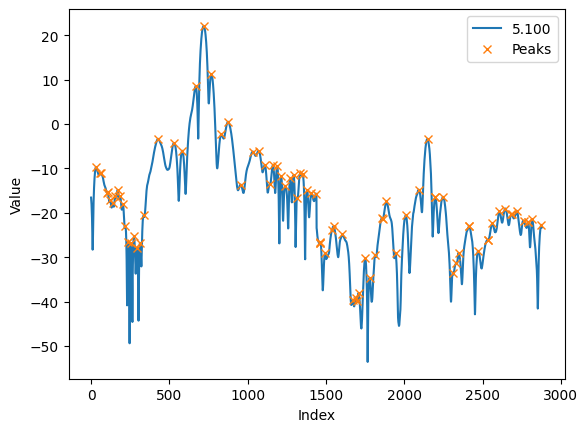

In [15]:
plt.plot(array, label='5.100')
plt.plot(peaks, array[peaks], 'x', label='Peaks')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

<Axes: xlabel='Scan Axis', ylabel='Gain in dB @ 7.050 GHz'>

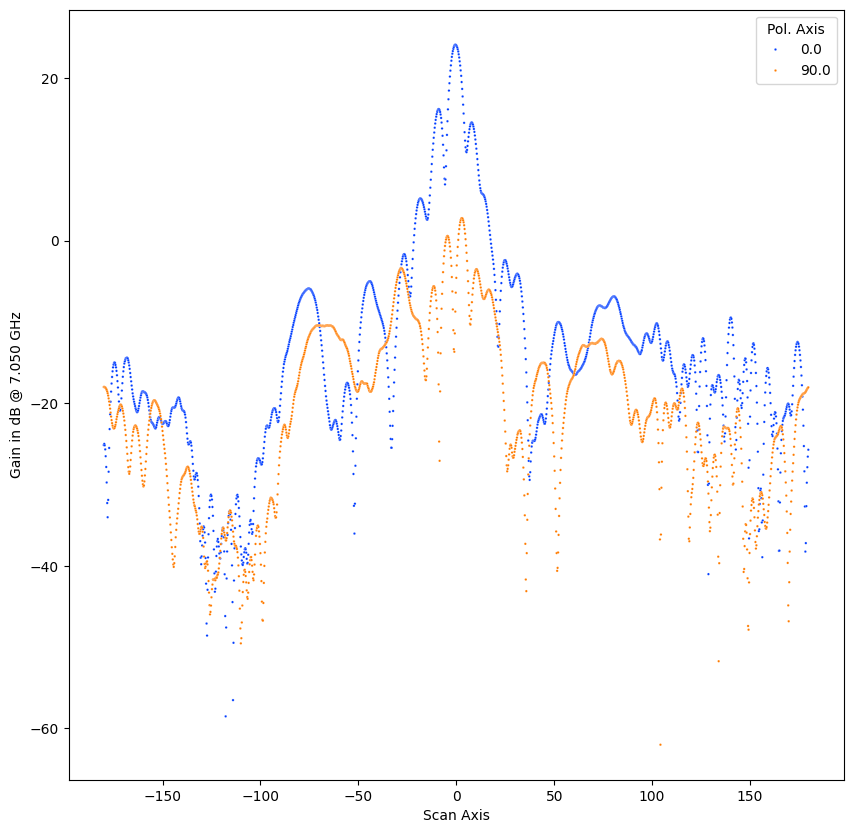

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=DF_AZI_FILE,x = DF_AZI_FILE['Scan Axis'], y = DF_AZI_FILE.iloc[:,80],s=3, hue='Pol. Axis', palette='bright')

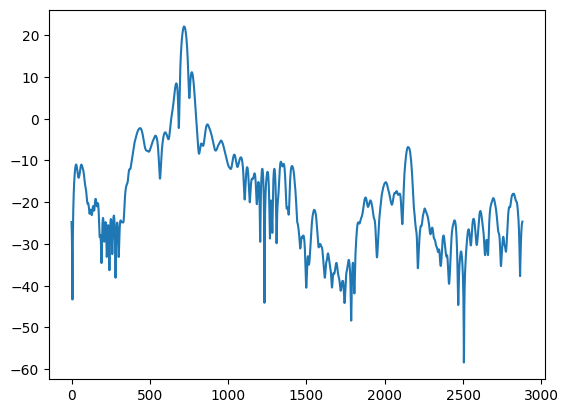

In [17]:
plt.plot(DF_AZI_FILE.iloc[:,6])

In [18]:
peaks

array([  32,   60,   62,  101,  105,  122,  138,  155,  169,  185,  203,
        219,  238,  255,  274,  293,  313,  335,  428,  529,  582,  667,
        719,  768,  831,  875,  955, 1033, 1070, 1109, 1142, 1161, 1188,
       1213, 1239, 1271, 1293, 1317, 1336, 1350, 1379, 1407, 1435, 1459,
       1462, 1464, 1493, 1538, 1548, 1605, 1672, 1689, 1696, 1708, 1750,
       1778, 1815, 1857, 1862, 1886, 1944, 2010, 2092, 2149, 2196, 2198,
       2247, 2309, 2333, 2346, 2413, 2415, 2471, 2532, 2535, 2563, 2607,
       2645, 2684, 2686, 2718, 2761, 2790, 2792, 2816, 2875])

In [19]:
dfplot = DF_AZI_FILE.iloc[:1440,1:87]

In [20]:
dfplot

9     Scan Axis  Gain in dB @ 5.100 GHz  Gain in dB @ 5.125 GHz  \
0       -180.00                 -16.567                 -18.806   
1       -179.75                 -16.993                 -19.402   
2       -179.50                 -17.559                 -20.112   
3       -179.25                 -18.114                 -20.981   
4       -179.00                 -18.972                 -22.145   
...         ...                     ...                     ...   
1435     178.75                 -15.666                 -17.473   
1436     179.00                 -15.710                 -17.612   
1437     179.25                 -15.792                 -17.775   
1438     179.50                 -15.980                 -18.020   
1439     179.75                 -16.246                 -18.354   

9     Gain in dB @ 5.150 GHz  Gain in dB @ 5.175 GHz  Gain in dB @ 5.200 GHz  \
0                    -19.687                 -22.116                 -24.751   
1                    -20.262                 -22.881                 -25.938   
2                    -21.015                 -23.939                 -27.464   
3                    -21.946                 -25.168                 -29.498   
4                    -23.207                 -26.860                 -32.537   
...                      ...                     ...                     ...   
1435                 -17.993                 -19.426                 -20.498   
1436                 -18.205                 -19.897                 -21.250   
1437                 -18.462                 -20.308                 -22.020   
1438                 -18.760                 -20.812                 -22.834   
1439                 -19.172                 -21.435                 -23.733   

9     Gain in dB @ 5.225 GHz  Gain in dB @ 5.250 GHz  Gain in dB @ 5.275 GHz  \
0                    -24.952                 -22.948                 -22.425   
1                    -25.992                 -23.996                 -23.640   
2                    -27.411                 -25.295                 -25.072   
3                    -29.346                 -27.045                 -26.795   
4                    -32.220                 -29.473                 -28.955   
...                      ...                     ...                     ...   
1435                 -21.109                 -19.206                 -18.053   
1436                 -21.794                 -19.880                 -18.801   
1437                 -22.638                 -20.610                 -19.596   
1438                 -23.338                 -21.328                 -20.460   
1439                 -24.089                 -22.086                 -21.376   

9     Gain in dB @ 5.300 GHz  ...  Gain in dB @ 6.975 GHz  Gain in dB @ 7 GHz  \
0                    -22.014  ...                 -18.589             -20.088   
1                    -23.165  ...                 -19.095             -20.517   
2                    -24.396  ...                 -19.704             -21.109   
3                    -25.691  ...                 -20.636             -21.957   
4                    -26.844  ...                 -21.807             -23.069   
...                      ...  ...                     ...                 ...   
1435                 -17.653  ...                 -18.894             -20.676   
1436                 -18.399  ...                 -18.500             -20.187   
1437                 -19.105  ...                 -18.283             -19.899   
1438                 -19.995  ...                 -18.203             -19.764   
1439                 -20.923  ...                 -18.320             -19.852   

9     Gain in dB @ 7.025 GHz  Gain in dB @ 7.050 GHz  Gain in dB @ 7.075 GHz  \
0                    -22.424                 -25.152                 -26.575   
1                    -22.635                 -25.007                 -26.186   
2                    -23.031                 -25.181        

In [21]:
dfplot.dtypes

9
Scan Axis                 float64
Gain in dB @ 5.100 GHz    float64
Gain in dB @ 5.125 GHz    float64
Gain in dB @ 5.150 GHz    float64
Gain in dB @ 5.175 GHz    float64
                           ...   
Gain in dB @ 7.100 GHz    float64
Gain in dB @ 7.125 GHz    float64
Gain in dB @ 7.150 GHz    float64
Gain in dB @ 7.175 GHz    float64
Gain in dB @ 7.200 GHz    float64
Length: 86, dtype: object

In [42]:
fig = px.line(dfplot, x = dfplot.iloc[:,0], y = dfplot.columns[1:86])

# , template='plotly_dark'

fig.update_layout(
    width=1500,  # Set the width of the plot
    height=900,   # Set the height of the plot
)


fig.show()

In [41]:
# import pandas as pd
# from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

df1 = pd.DataFrame(
   dict(
      name=['John', 'James', 'Stephen', 'Kandy'],
      age=[23, 45, 12, 34]
   )
)

df2 = pd.DataFrame(
   dict(
      subject=['Math', 'Physics', 'Chemistry', 'Biology'],
      marks=[67, 98, 90, 75]
   )
)

ax = df1.plot(x='name', y='age')
df2.plot(ax= ax, y='marks')

plt.show()

TypeError: line() got an unexpected keyword argument 'ax'